# Time Series and statistical analysis part 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.testing as tm
import matplotlib as plt
from matplotlib import pyplot as plt

The purpose of this notebook is to show the autocorrelation and first order differences of the COVID-19 data, the number of infected persons per day. As well as the partial autocorrelation function. Visualizing these results can help determine what kind of models to construct later in the modelling phase. 

## Dataset 1: aantallen_gemeente_cumulatief 

In [2]:
dutch_data_01 = pd.read_csv('/Users/stevenkraamwinkel/Desktop/Datasets 1 mei/COVID-19_aantallen_gemeente_cumulatief_01_05.csv', parse_dates=True, delimiter=';')
display(dutch_data_01)


,Date_of_report,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
0,13/03/2020 10:00,GM0003,Appingedam,Groningen,0,0,0
1,13/03/2020 10:00,GM0010,Delfzijl,Groningen,0,0,0
2,13/03/2020 10:00,GM0014,Groningen,Groningen,3,0,0
3,13/03/2020 10:00,GM0024,Loppersum,Groningen,0,0,0
4,13/03/2020 10:00,GM0034,Almere,Flevoland,1,1,0
...,...,...,...,...,...,...,...
151955,01/05/2021 10:00,NaN,NaN,Noord-Holland,668,20,2
151956,01/05/2021 10:00,NaN,NaN,Zuid-Holland,2312,46,15
151957,01/05/2021 10:00,NaN,NaN,Zeeland,56,4,1
151958,01/05/2021 10:00,NaN,NaN,Noord-Brabant,1144,29,7


## Applied statistical analysis

In [3]:
#Selecting columns
dutch_data_01 = dutch_data_01[['Date_of_report', 'Total_reported', 'Hospital_admission', 'Deceased']]

dutch_data_01['Date_of_report']= pd.to_datetime(dutch_data_01['Date_of_report'], format='%d/%m/%Y %H:%M')
dutch_data_01 = dutch_data_01.set_index('Date_of_report')

display(dutch_data_01)
dutch_data_01.dtypes

,Total_reported,Hospital_admission,Deceased
Date_of_report,,,
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,3,0,0
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,1,1,0
...,...,...,...
2021-05-01 10:00:00,668,20,2
2021-05-01 10:00:00,2312,46,15
2021-05-01 10:00:00,56,4,1


Total_reported        int64
Hospital_admission    int64
Deceased              int64
dtype: object

In [4]:
dutch_data_01 = dutch_data_01.resample('D').sum()
dutch_data_01

,Total_reported,Hospital_admission,Deceased
Date_of_report,,,
2020-03-13,804,115,9
2020-03-14,959,136,12
2020-03-15,1135,162,19
2020-03-16,1413,205,23
2020-03-17,1705,314,40
...,...,...,...
2021-04-27,1472674,28445,17093
2021-04-28,1481323,28517,17104
2021-04-29,1488594,28580,17124


### Total COVID-19 cases reported per day

In [5]:
#Cumulative function found from source: 
#https://codereview.stackexchange.com/questions/117183/extracting-original-values-
#from-cumulative-sum-values

cumulative = dutch_data_01['Total_reported']

#Calculating daily counts from the cumulative sum
def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values from the daily cumulative values
print(B(cumulative))


[804, 155, 176, 278, 292, 346, 409, 1191, -20, 573, 545, 811, 852, 1019, 1172, 1159, 1104, 884, 845, 1019, 1083, 1026, 904, 1224, 952, 777, 969, 1213, 1335, 1316, 1174, 964, 868, 734, 1061, 1235, 1140, 1066, 750, 729, 708, 887, 806, 655, 655, 400, 171, 386, 514, 475, 445, 335, 199, 317, 232, 455, 319, 289, 245, 161, 196, 227, 270, 200, 189, 125, 146, 108, 198, 253, 188, 176, 172, 209, 133, 190, 182, 176, 131, 185, 103, 102, 86, 209, 210, 183, 239, 165, 164, 184, 164, 210, 179, 143, 165, 139, 117, 115, 107, 76, 91, 65, 64, 82, 110, 91, 69, 73, 76, 50, 62, 77, 75, 61, 73, 36, 37, 52, 52, 42, 81, 101, 71, 53, 106, 99, 103, 127, 144, 185, 163, 168, 163, 191, 137, 214, 205, 223, 247, 342, 338, 431, 366, 372, 485, 426, 601, 519, 486, 577, 630, 779, 654, 577, 636, 655, 507, 482, 489, 552, 529, 535, 508, 457, 574, 415, 571, 510, 507, 501, 508, 527, 462, 734, 601, 744, 654, 925, 797, 964, 1140, 823, 1270, 1231, 1087, 1300, 1379, 1542, 1753, 1974, 1887, 1844, 2217, 2245, 2357, 2544, 2777, 2713, 

In [6]:
data_01 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Number_of_cases'})
data_01_weekly_average = data_01.resample('W').mean()

display(data_01)
display(data_01_weekly_average)

,Number_of_cases
2020-03-13,804
2020-03-14,155
2020-03-15,176
2020-03-16,278
2020-03-17,292
...,...
2021-04-27,5337
2021-04-28,8649
2021-04-29,7271
2021-04-30,7758


,Number_of_cases
2020-03-15,378.333333
2020-03-22,438.428571
2020-03-29,951.714286
2020-04-05,997.857143
2020-04-12,1105.142857
2020-04-19,1009.714286
2020-04-26,741.428571
2020-05-03,389.428571
2020-05-10,293.714286
2020-05-17,195.428571


Text(0, 0.5, 'Week average on COVID-19 cases')

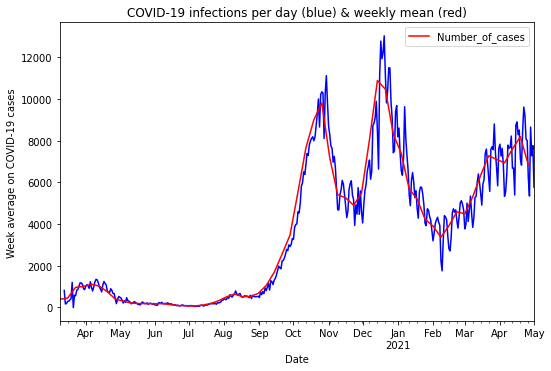

In [7]:
#Plot original time series and weekly mean
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.add_subplot(1,1,1)

data_01['Number_of_cases'].plot(ax=ax, color='b')
data_01_weekly_average.plot(ax=ax, color='r')

ax.set_title('COVID-19 infections per day (blue) & weekly mean (red)')
ax.set_xlabel('Date')
ax.set_ylabel('Week average on COVID-19 cases')


### Hospitalizations per day

In [8]:
cumulative = dutch_data_01['Hospital_admission']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values from the daily cumulative values

print(B(cumulative))

[115, 21, 26, 43, 109, 94, 81, 159, 188, 152, 242, 265, 341, 315, 349, 454, 529, 507, 722, 447, 625, 501, 336, 253, 260, 292, 308, 237, 225, 190, 196, 147, 210, 188, 182, 156, 129, 110, 75, 118, 124, 137, 123, 100, 75, 65, 88, 76, 84, 85, 93, 41, 36, 79, 20, 33, 71, 58, 22, 36, 35, 52, 27, 35, 45, 15, 27, 34, 14, 13, 9, 10, 13, 8, 10, 7, 16, 9, 5, 8, 9, 6, 9, 12, 11, 3, 4, 5, 6, 5, 3, 5, 9, 6, 3, 3, 2, -1, 11, 0, 3, 2, 2, 6, 4, 5, 0, 3, 3, 3, 1, 0, 4, 1, 1, 0, 2, 3, -2, 1, 3, 2, 1, -2, 5, 1, -4, 1, 3, 2, 2, 0, 3, -1, 2, 2, 5, 6, 3, 5, 7, 3, 6, 6, 10, 5, 1, 4, 2, 7, 6, 10, 9, 6, 11, 7, 6, 5, 4, 18, 10, 18, 11, 8, 4, 15, 19, 7, 9, 2, 3, 11, 5, 6, 5, 7, 5, 5, 9, 6, 8, 17, 10, 6, 17, 8, 24, 15, 14, 12, 33, 20, 26, 32, 32, 25, 36, 29, 37, 38, 46, 48, 47, 22, 30, 24, 59, 80, 63, 50, 66, 49, 53, 58, 111, 74, 74, 85, 80, 69, 84, 93, 101, 110, 112, 92, 109, 77, 109, 91, 80, 106, 117, 109, 89, 103, 100, 98, 89, 121, 94, 54, 74, 72, 92, 87, 92, 96, 86, 79, 104, 93, 64, 82, 67, 50, 81, 74, 64, 77,

In [9]:
data_02 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Hospital_Admissions'})
data_02_weekly_average = data_02.resample('W').mean()

display(data_02)
display(data_02_weekly_average)

,Hospital_Admissions
2020-03-13,115
2020-03-14,21
2020-03-15,26
2020-03-16,43
2020-03-17,109
...,...
2021-04-27,78
2021-04-28,72
2021-04-29,63
2021-04-30,78


,Hospital_Admissions
2020-03-15,54.000000
2020-03-22,118.000000
2020-03-29,356.428571
2020-04-05,484.428571
2020-04-12,244.000000
2020-04-19,160.285714
2020-04-26,107.428571
2020-05-03,76.000000
2020-05-10,45.571429
2020-05-17,35.000000


Text(0, 0.5, 'Hospital admissions')

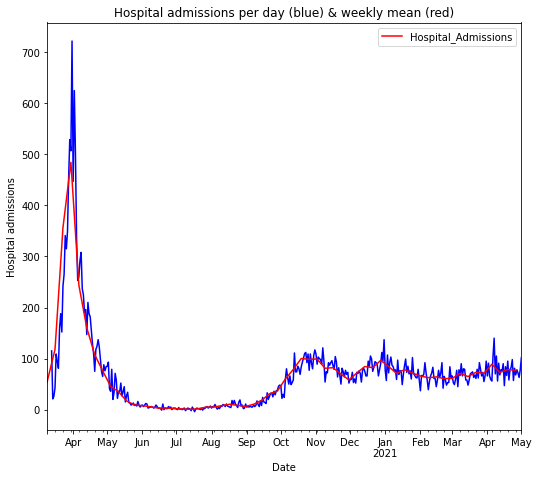

In [10]:
#Plot original time series and weekly mean
fig = plt.figure(figsize=(8.5, 7.5))
ax = fig.add_subplot(1,1,1)

data_02['Hospital_Admissions'].plot(ax=ax, color='b')
data_02_weekly_average.plot(ax=ax, color='r')

ax.set_title('Hospital admissions per day (blue) & weekly mean (red)')
ax.set_xlabel('Date')
ax.set_ylabel('Hospital admissions')

### COVID-19 casualties per day

In [11]:
cumulative = dutch_data_01['Deceased']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values from the daily cumulative values
print(B(cumulative))

[9, 3, 7, 4, 17, 16, 21, 28, 31, 44, 33, 63, 80, 78, 112, 93, 132, 93, 175, 134, 166, 148, 164, 117, 99, 234, 147, 148, 115, 132, 94, 86, 122, 189, 181, 144, 142, 83, 67, 165, 138, 123, 112, 120, 66, 43, 48, 145, 84, 98, 94, 69, 26, 86, 36, 84, 71, 63, 18, 16, 54, 52, 28, 53, 27, 10, 14, 21, 33, 27, 13, 23, 11, 8, 26, 15, 32, 28, 20, 5, 6, 5, 10, 13, 15, 6, 2, 3, 15, 11, 2, 9, 4, 2, 6, 5, 4, 4, 3, 8, 1, 0, 5, 2, 3, 3, 2, 0, 2, 6, 2, 3, 2, 6, 1, 1, 4, 3, 2, -1, 1, 0, 0, -2, 1, 1, 1, -2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 4, 2, 0, 0, 1, 1, 0, 1, 3, 0, 1, 3, 0, 0, 2, 2, 4, 2, 2, 3, 0, 3, 6, 10, 4, 5, 0, 2, 5, 8, 3, 2, 4, 0, 0, 6, 5, 0, 2, 4, 2, 0, 1, 2, 3, 3, 1, 1, 2, 2, 2, 6, 7, 2, 4, 2, 10, 5, 16, 16, 38, 8, 6, 13, 13, 13, 9, 21, 5, 7, 21, 36, 13, 13, 23, 17, 12, 35, 32, 29, 16, 29, 14, 17, 46, 59, 46, 45, 55, 27, 26, 70, 60, 56, 87, 50, 39, 29, 113, 106, 87, 118, 73, 44, 39, 98, 74, 89, 54, 85, 43, 44, 86, 82, 73, 51, 48, 21, 54, 90, 74, 75, 83, 59, 23, 27, 62, 66, 61, 58, 39, 25, 17, 71, 66, 

In [12]:
data_03 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Deceased'})
data_03_weekly_average = data_03.resample('W').mean()

display(data_03)
display(data_03_weekly_average)

,Deceased
2020-03-13,9
2020-03-14,3
2020-03-15,7
2020-03-16,4
2020-03-17,17
...,...
2021-04-27,31
2021-04-28,11
2021-04-29,20
2021-04-30,24


,Deceased
2020-03-15,6.333333
2020-03-22,23.000000
2020-03-29,84.428571
2020-04-05,142.428571
2020-04-12,138.428571
2020-04-19,135.285714
2020-04-26,113.000000
2020-05-03,83.000000
2020-05-10,54.857143
2020-05-17,34.285714


Text(0, 0.5, 'COVID-19 deaths')

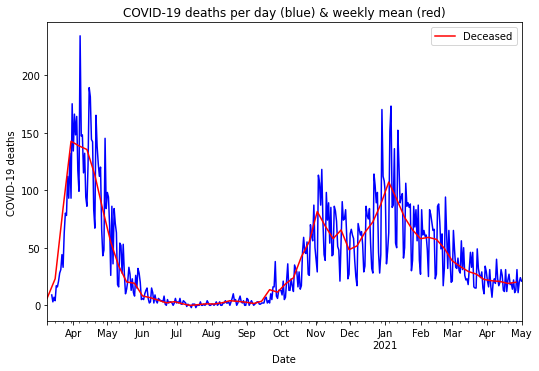

In [13]:
#Plot original time series and weekly mean
fig = plt.figure(figsize=(8.5, 5.5))
ax = fig.add_subplot(1,1,1)

data_03['Deceased'].plot(ax=ax, color='b')
data_03_weekly_average.plot(ax=ax, color='r')

ax.set_title('COVID-19 deaths per day (blue) & weekly mean (red)')
ax.set_xlabel('Date')
ax.set_ylabel('COVID-19 deaths')

## First-order differences and auto-correlation function

In [14]:
#Differencing, Autocorrelation, and also plotting function were derived from source:
#Practical Time Series Analysis, Master Time Series Data Processing, Visualization,
#and Modeling using Python – Dr. Avishek Pal, Dr. PKS Prakash
#Tutorial Text book

from statsmodels.tsa import stattools
%matplotlib inline
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm


In [15]:
first_order_diff = data_01['Number_of_cases'].diff(1)
first_order_diff


2020-03-13       NaN
2020-03-14    -649.0
2020-03-15      21.0
2020-03-16     102.0
2020-03-17      14.0
               ...  
2021-04-27    -863.0
2021-04-28    3312.0
2021-04-29   -1378.0
2021-04-30     487.0
2021-05-01   -2003.0
Freq: D, Name: Number_of_cases, Length: 415, dtype: float64

Text(0.5, 1.0, 'First-order differences of COVID-19 cases')

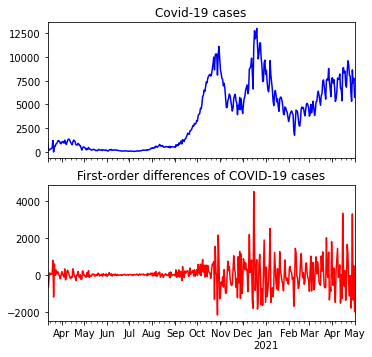

In [16]:
#Let us plot the original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
data_01['Number_of_cases'].plot(ax=ax[0], color='b')
ax[0].set_title('Covid-19 cases')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of COVID-19 cases')


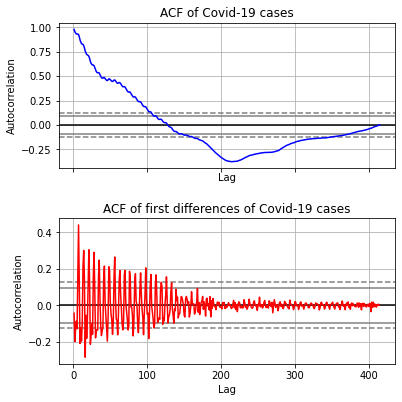

In [17]:
#ACF plot of original time series and first-differences
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(data_01['Number_of_cases'], color='b', ax=ax[0])
ax[0].set_title('ACF of Covid-19 cases')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of Covid-19 cases')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)


## ACF and PACF plot with statsmodels sm

/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


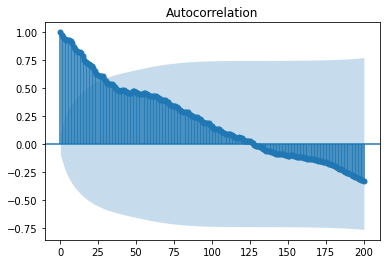

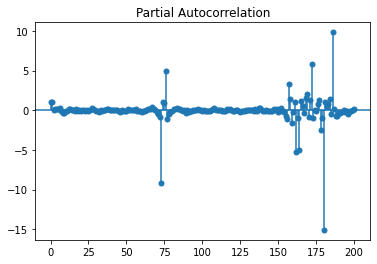

In [18]:
# Code derived from source:
#https://www.youtube.com/watch?v=SxtiUWWICSk&ab_channel=DataScienceShow
sm.graphics.tsa.plot_acf(data_01.values.squeeze(), lags = 200)
sm.graphics.tsa.plot_pacf(data_01.values.squeeze(), lags =200)
plt.show()


VERSION: 19TH OF JUNE, 2021. 
